In [12]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt

In [34]:
with open('../data/wiki/data.csv', 'r') as fin:
    data = fin.readlines()

with open('../data/wiki/data_cleaned.csv', 'w') as fout:
    for line in data:
        line = line.split(',')
        if len(line) > 554:
            line = line[:3] + ["_".join(line[3:-550])] + line[-550:]
        assert(len(line) == 554)
        line = ",".join(line)
        fout.write(line)

In [39]:
data = pd.read_csv('../data/wiki/data_cleaned.csv', sep=',')
cols = ['Category(countrycode)', 'Subcategory(access)', 'Subsubcategory(agent)', 'Page']
for c in cols:
    data[c] = data[c].astype('category').cat.codes
data

,Category(countrycode),Subcategory(access),Subsubcategory(agent),Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,1,0,1,1073,32,16,12,28,15,13,...,83,68,47,48,63,75,86,39,71,88
1,4,2,0,2100,165,133,152,215,226,184,...,104,169,114,128,110,128,133,154,99,111
2,1,0,0,1308,2569,2622,2780,2793,3100,3109,...,12347,12224,14518,12373,14352,24551,30958,21849,16542,13399
3,0,2,0,1051,15,28,20,30,58,23,...,183,74,88,76,82,46,55,55,29,29
4,3,0,1,2370,4,5,3,6,23,7,...,277,169,139,162,100,1415,290,152,128,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3,0,1,2402,2,1,1,2,3,1,...,2113,9984,3635,5792,1813,1372,8958,3847,5704,10078
2996,0,1,0,1402,829,696,695,399,561,764,...,536,469,678,448,590,714,880,1240,871,436
2997,0,1,0,1239,542,566,555,514,515,662,...,778,603,429,560,557,689,584,688,660,599
2998,2,2,0,688,127,158,143,202,279,171,...,389,479,410,505,422,393,346,439,416,1962


In [13]:
with open('../logs/wiki/hid_64_exp_1_norm/run_1/val.pkl', 'rb') as fin:
    pred, true = pickle.load(fin)

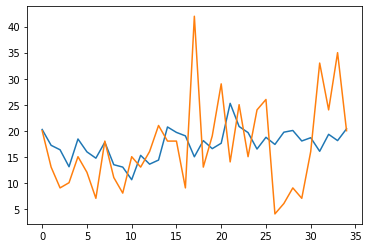

In [43]:
idx = 107
plt.plot(pred[:, idx])
plt.plot(true[:, idx])